In [40]:
# https://www.kaggle.com/kmader/from-trained-u-net-to-submission-part-2
from train import *
from _utils import *
import tensorflow as tf
import numpy as np
import pandas as pd

def create_submit():
    with tf.Session() as sess:
        model_dir = os.path.join(os.getcwd(),"save_model")
        print(model_dir)
        
        saver = tf.train.import_meta_graph(os.path.join(model_dir, "airbus_model.meta"))
        saver.restore(sess, "./save_model/airbus_model")

        graph = tf.get_default_graph()
        x_holder = graph.get_tensor_by_name("x_holder:0")
        pixel_pred = graph.get_tensor_by_name("pixel_pred:0")

        test_dir = "../data/test"
        image_id = np.array(os.listdir(test_dir))
        images_encode = []
        for img_name in tqdm(image_id[:10]):
            image = cv2.imread(os.path.join(test_dir, img_name))/255.0
            # image = cv2.resize(image_shape)
            image = image[np.newaxis,:]
            pred = sess.run(pixel_pred, feed_dict={x_holder:image})
            masks = multi_rle_encode(pred)
            if len(masks) > 0:
                for mask in masks:
                    print(img_name, mask)
                    images_encode += [{'ImageId': img_name, 'EncodedPixels': mask}]
            else:
                images_encode += [{'ImageId': img_name, 'EncodedPixels': None}]



        submit_df = pd.DataFrame(images_encode)[['ImageId', 'EncodedPixels']]
        submit_df.to_csv('submission.csv', index=False)

        return submit_df

In [45]:
import matplotlib.pyplot as plt


In [42]:
df = create_submit()

/Users/ruizheng/Desktop/Projects/Kaggle Airbus Ship Detection Challenge/scratch/save_model
INFO:tensorflow:Restoring parameters from ./save_model/airbus_model


100%|██████████| 10/10 [00:03<00:00,  3.27it/s]


INFO:tensorflow:Restoring parameters from ./save_model/airbus_model


5it [00:01,  2.81it/s]


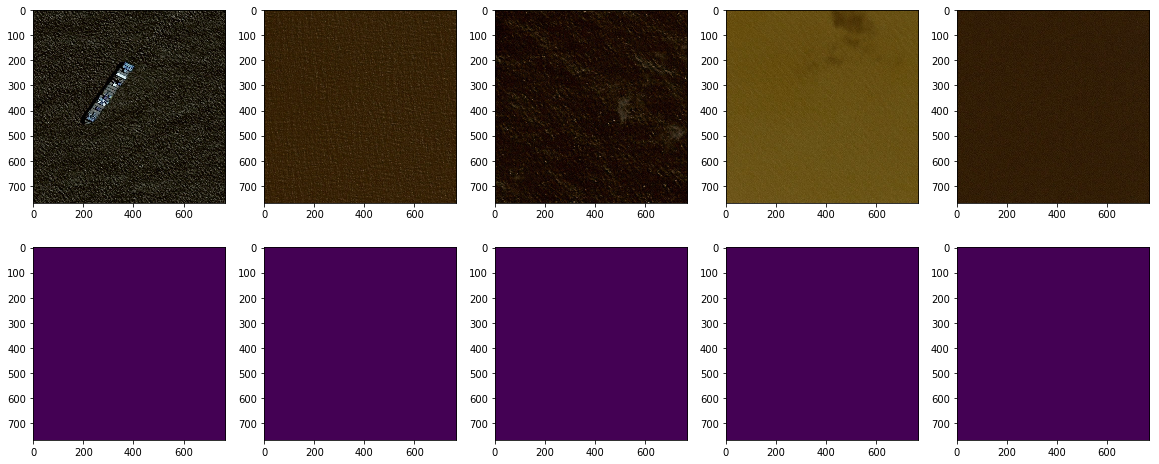

In [47]:
sess = tf.Session()
model_dir = "./save_model"
saver = tf.train.import_meta_graph(os.path.join(model_dir, "airbus_model.meta"))
saver.restore(sess, "./save_model/airbus_model")

graph = tf.get_default_graph()
x_holder = graph.get_tensor_by_name("x_holder:0")
pixel_pred = graph.get_tensor_by_name("pixel_pred:0")


test_dir = "../data/train"
image_id = np.array(os.listdir(test_dir))
import matplotlib.pyplot as plt
_, axes = plt.subplots(2,5, figsize=(20,8))
for i,img_name in tqdm(enumerate(image_id[10:15])):
    image = cv2.imread(os.path.join(test_dir, img_name))
    axes[0, i].imshow(image)
    image = image/255.0
    # image = cv2.resize(image_shape)
    image = image[np.newaxis,:]
    pred = sess.run(pixel_pred, feed_dict={x_holder:image})
    #print(np.sum(pred))
    image = cv2.imread(os.path.join(test_dir, img_name))

    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # print(image.shape, pred.shape)
    axes[1,i].imshow(pred.reshape(pred.shape[1:]))

In [35]:
print(len([v for v in tf.trainable_variables()]))
[v for v in tf.trainable_variables()][:10]

600


[<tf.Variable 'conv1_1/kernel:0' shape=(3, 3, 3, 8) dtype=float32_ref>,
 <tf.Variable 'conv1_1/bias:0' shape=(8,) dtype=float32_ref>,
 <tf.Variable 'conv1_2/kernel:0' shape=(3, 3, 8, 8) dtype=float32_ref>,
 <tf.Variable 'conv1_2/bias:0' shape=(8,) dtype=float32_ref>,
 <tf.Variable 'conv2_1/kernel:0' shape=(3, 3, 8, 16) dtype=float32_ref>,
 <tf.Variable 'conv2_1/bias:0' shape=(16,) dtype=float32_ref>,
 <tf.Variable 'conv2_2/kernel:0' shape=(3, 3, 16, 16) dtype=float32_ref>,
 <tf.Variable 'conv2_2/bias:0' shape=(16,) dtype=float32_ref>,
 <tf.Variable 'conv3_1/kernel:0' shape=(3, 3, 16, 32) dtype=float32_ref>,
 <tf.Variable 'conv3_1/bias:0' shape=(32,) dtype=float32_ref>]

In [36]:
print(sess.run('conv1_1/bias:0'))

[0.08300916 0.1380163  0.07667268 0.08752955 0.1011663  0.13372058
 0.08749726 0.09656898]


In [49]:
w = np.load("../vgg_model/vgg/saved_model.pb", encoding='latin1').item()

OSError: Failed to interpret file '../vgg_model/vgg/saved_model.pb' as a pickle

In [6]:
import os
os.listdir()

['__pycache__',
 '_utils.py',
 '.ipynb_checkpoints',
 'submit.py',
 'save_model',
 'submit_df.ipynb',
 'train.py',
 'submission.csv',
 'debug.ipynb']